# Prime numbers and the sieve of Eratosthenes
_Author: An enthusiastic scientist, a terrible programmer._

The sieve of Eratosthenes is a simple and famous algorithm for factoring prime
numbers. I was always fascinated with prime numbers, so I am very excited about new project!

Let's start with a simple implementation of the Sieve or Eratosthenes:

In [9]:
from sieve-tools import sieve
from sieve-tools import plots
import imp; imp.reload(sieve)
import imp; imp.reload(plots)

/tmp/ipykernel_429/3965914521.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp; imp.reload(sieve)


<module 'sieve' from '/home/jovyan/site/lab/lab04/sieve.py'>

In [1]:
%%time

import sys
import math
import numpy as np

all_primes = []
nmax = 55

if nmax == 2: 
    all_primes = [2]
else:
    primes_head = [2]
    first = 3
    primes_tail = np.arange(first,nmax+1,2)
    while first <= round(math.sqrt(primes_tail[-1])):
        first = primes_tail[0]
        primes_head.append(first)
        non_primes = first * primes_tail
        primes_tail = np.array([ n for n in primes_tail[1:]
                                if n not in non_primes ])

all_primes = primes_head + primes_tail.tolist()
all_primes

CPU times: user 231 ms, sys: 361 ms, total: 591 ms
Wall time: 135 ms


[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53]

Now, let's do something a little bit more efficient. This code should give me the same than before, but in less time. 

In [2]:
%%time 

all_primes = []

if nmax == 2: 
    all_primes = [2]

else:

    primes_head = [2]
    first = 3

    # The primes tail will be kept both as a set and as a sorted list
    primes_tail_lst = range(first,nmax+1,2)
    primes_tail_set = set(primes_tail_lst)

    # Now do the actual sieve
    while first <= round(math.sqrt(primes_tail_lst[-1])):
        # Move the first leftover prime from the set to the head list
        first = primes_tail_lst[0]
        primes_tail_set.remove(first)  # remove it from the set
        primes_head.append(first) # and store it in the head list

        # Now, remove from the primes tail all non-primes.  For us to be able
        # to break as soon as a key is not found, it's crucial that the tail
        # list is always sorted.
        for next_candidate in primes_tail_lst:
            try:
                primes_tail_set.remove(first * next_candidate)
            except KeyError:
                break

        # Build a new sorted tail list with the leftover keys
        primes_tail_lst = list(primes_tail_set)
        primes_tail_lst.sort()

    all_primes = primes_head + primes_tail_lst
    
all_primes

CPU times: user 25 µs, sys: 15 µs, total: 40 µs
Wall time: 41.7 µs


[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53]

## Long Run: proportion of primer numbers

Now I am interested in knowing what is the proportion of prime numbers smaller than some `nmax`. This next for loop runs the last implementation of the sieve of Eratosthenes for different numbers. 

In [3]:
%%time 

all_nmax = np.arange(100, 5000, 100)
all_proportions = []

for nmax in all_nmax:
    
    all_primes = []

    if nmax == 2: 
        all_primes = [2]

    else:

        primes_head = [2]
        first = 3

        # The primes tail will be kept both as a set and as a sorted list
        primes_tail_lst = range(first,nmax+1,2)
        primes_tail_set = set(primes_tail_lst)

        # Now do the actual sieve
        while first <= round(math.sqrt(primes_tail_lst[-1])):
            # Move the first leftover prime from the set to the head list
            first = primes_tail_lst[0]
            primes_tail_set.remove(first)  # remove it from the set
            primes_head.append(first) # and store it in the head list

            # Now, remove from the primes tail all non-primes.  For us to be able
            # to break as soon as a key is not found, it's crucial that the tail
            # list is always sorted.
            for next_candidate in primes_tail_lst:
                try:
                    primes_tail_set.remove(first * next_candidate)
                except KeyError:
                    break

            # Build a new sorted tail list with the leftover keys
            primes_tail_lst = list(primes_tail_set)
            primes_tail_lst.sort()

        all_primes = primes_head + primes_tail_lst

    all_proportions.append(len(all_primes) / nmax)

CPU times: user 17.4 ms, sys: 0 ns, total: 17.4 ms
Wall time: 17 ms


In [4]:
plt.plot(all_nmax, all_proportions)
plt.xlabel("N")
plt.ylabel("Proportion of primer numbers")

NameError: name 'plt' is not defined

OIn theory this should look like $1 / ln(N)$. Let's make the plot in log scale, since it seems more meaninful in this way.

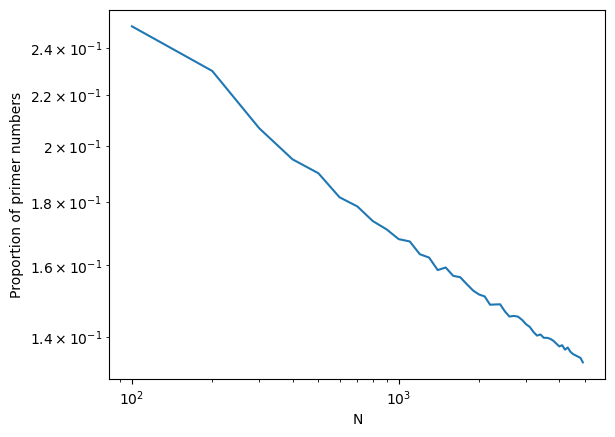

In [30]:
plt.plot(all_nmax, all_proportions)
plt.xlabel("N")
plt.ylabel("Proportion of primer numbers")
plt.xscale("log")
plt.yscale("log")

## Performance

It will be great to compare the performance of the two algorithms as we increase the window search. 

Write a function that computes the overall time of a program. I guess something like this should work. The function `time.perf_counter` can be useful here. 

In [ ]:
import time

def time_rng(fun, nrange, verbose=False):
    """
    Time a function over a range of parameters.

    Returns the list of run times.

    The function should be callable with a single argument: it will be
    called with each entry from nrange in turn.

    If verbose is true, at each step the value of nrange and time for the
    call is printed.
    """

    # BEGIN SOLUTION
    

    # END SOLUTION
    return nrange, times

Plot!!! Make a comparision of the two methods. 